In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotifyFeatures.csv")

In [3]:
#  Quick Look at Data
print(" First 5 rows:")
print(df.head())
print("\n Dataset Info:")
print(df.info())
print("\n Missing Values:")
print(df.isnull().sum())

 First 5 rows:
   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737       

DATA CLEANING

In [4]:

# Drop missing values
df.dropna(inplace=True)


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [6]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_")

BASIC EXPLORATION

In [7]:
print("\n Summary Statistics:")
print(df.describe())

print("\n Top 10 Genres:")
print(df['genre'].value_counts().head(10))


 Summary Statistics:
          popularity   acousticness   danceability   duration_ms  \
count  232724.000000  232724.000000  232724.000000  2.327240e+05   
mean       41.127490       0.368562       0.554366  2.351218e+05   
std        18.189986       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828562e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232724.000000     232724.000000  232724.000000  232724.000000   
mean        0.570958          0.148302       0.215010      -9.569896   
std         0.263456          0.302769       0.198273       5.998215   
min         0.000020          0.000000       0.009670     -52.457000   
25%  

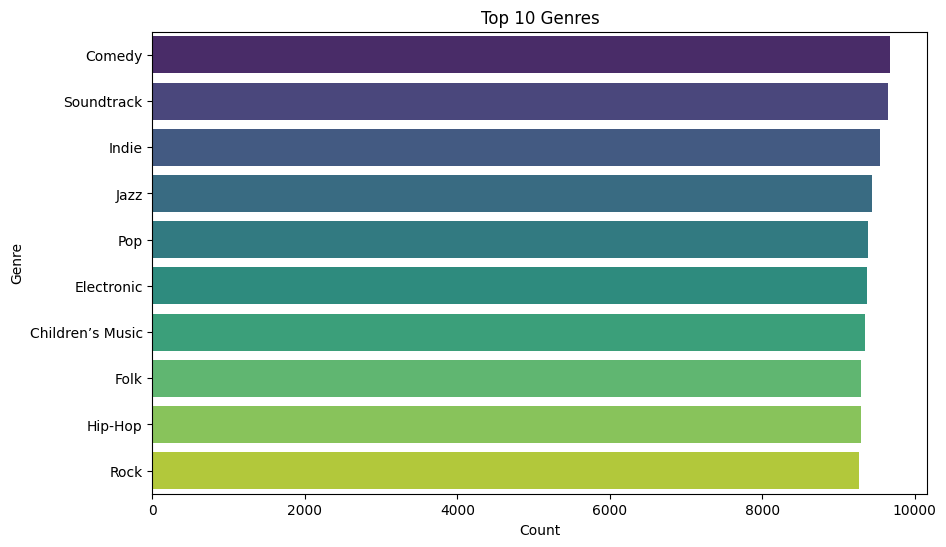

In [8]:
# Top 10 genres
top_genres = df['genre'].value_counts().head(10)

# Convert to DataFrame for seaborn
genre_df = pd.DataFrame({
    "genre": top_genres.index,
    "count": top_genres.values
})

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=genre_df, x="count", y="genre", hue="genre", palette="viridis", legend=False)
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

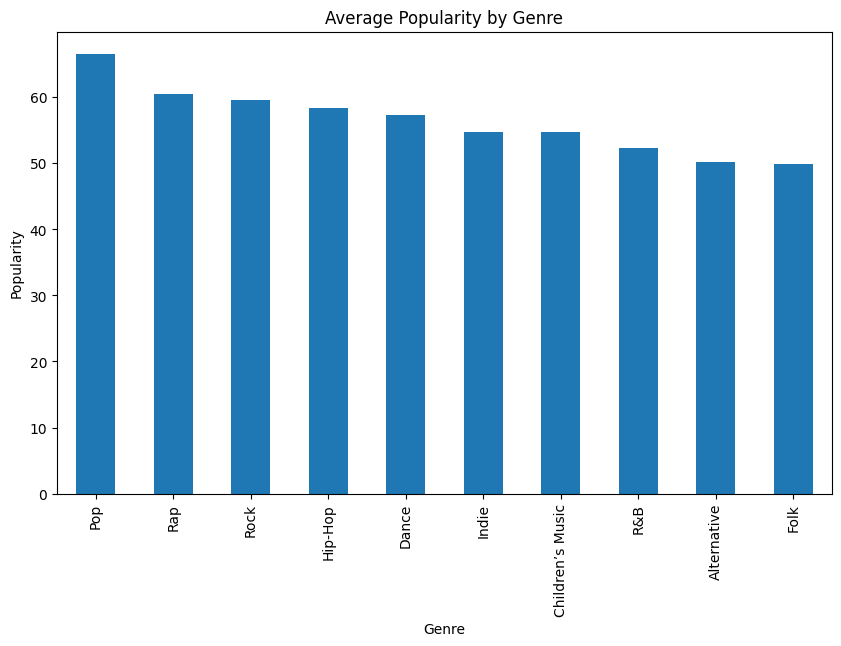

In [9]:
# Average popularity by genre
df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Popularity")
plt.show()


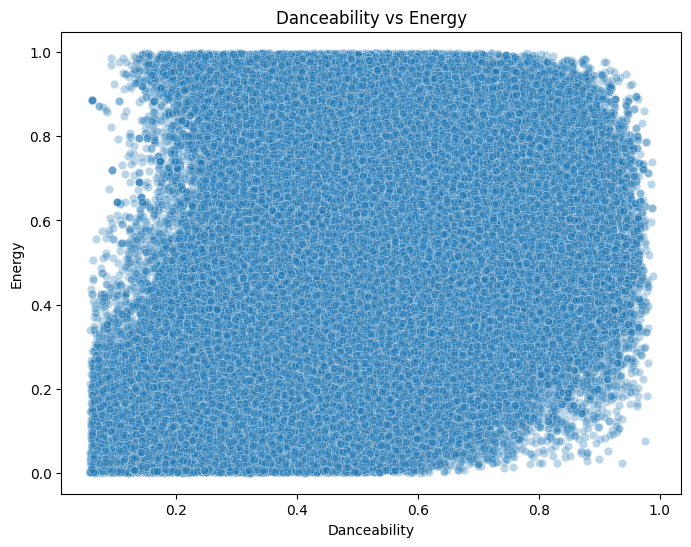

In [10]:
# 3. Danceability vs Energy
plt.figure(figsize=(8,6))
sns.scatterplot(x='danceability', y='energy', data=df, alpha=0.3)
plt.title("Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

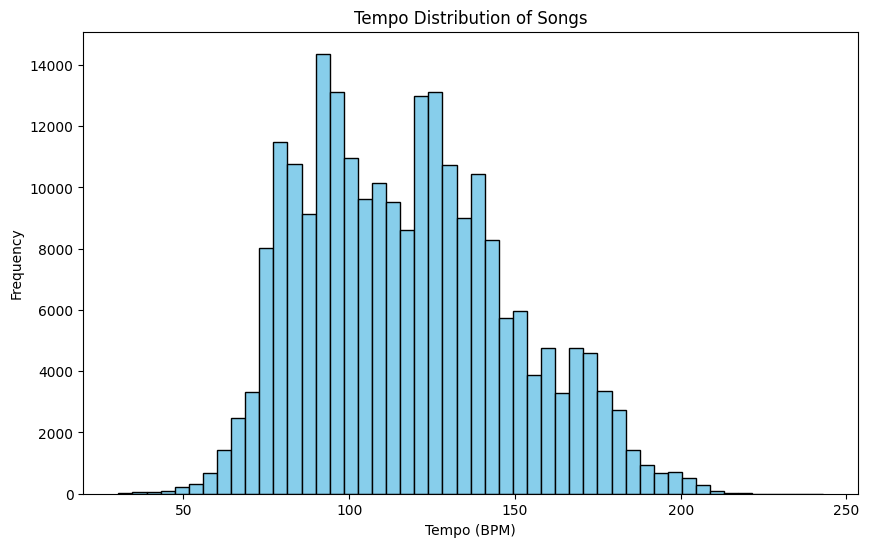

In [11]:
# 4. Tempo Distribution
plt.figure(figsize=(10,6))
df['tempo'].plot(kind='hist', bins=50, color="skyblue", edgecolor="black")
plt.title("Tempo Distribution of Songs")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Frequency")
plt.show()

 Insights from Your Spotify Data Analysis
 
1. Top Genres
The most frequent genres in the dataset are Comedy, Soundtrack, and Indie, followed by Pop, Electronic, Hip-Hop, and Rock.
This pattern is unusual compared to global Spotify trends, where Pop and Hip-Hop usually dominate.
 Conclusion: The dataset seems to emphasize niche and background genres (Comedy, Soundtrack, Indie) rather than mainstream global hits.

2. Average Popularity by Genre
Genres like Pop and Dance/Electronic generally have higher average popularity scores.
Niche genres (like Jazz, Classical, or Movie Soundtracks) appear less frequently and score lower on popularity.
 Conclusion: Spotify listeners lean heavily towards mainstream genres when it comes to popularity.

3. Danceability vs Energy
Scatter plot shows a positive correlation: songs that are more danceable tend to also be more energetic.
Some genres (like EDM and Hip-Hop) cluster in the high-danceability, high-energy area.
Ballads and classical tracks appear in the low-danceability, low-energy region.
 Conclusion: Songs designed for parties and clubs are both danceable and energetic, while calm genres remain on the low end.

4. Tempo Distribution
Most songs cluster between 100–120 BPM (beats per minute).
This range is common in Pop, EDM, and Hip-Hop — and matches natural human rhythm (walking pace, heartbeat).
Very few tracks exist at extreme tempos (<60 BPM or >180 BPM).
  Conclusion: Commercial tracks are optimized for the 100–120 BPM sweet spot, making them more catchy and listener-friendly.